In [130]:
#import all relevant libraries
import matplotlib.colors as mcolors
import random
from matplotlib.patches import Patch
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

Dataset references = GBIF.org (31 January 2024) GBIF Occurrence Download  https://doi.org/10.15468/dl.uabtae

In [90]:
#inspect the dtafile and use it to create a dataframe 
filename = "Global Marine biodiversity data.csv"
with open(filename) as f:
    df = pd.read_csv(filename, delimiter="\t")
newdf =  df.fillna("Unknown")
print(newdf.head())
print(newdf.columns)

                                             gbifID  \
0  3400914131  aa0eee05-8fb0-4dcb-8f20-41b7e4e7fca5   
1                                        3400914130   
2                                        3400914129   
3                                        3400914128   
4                                        3400914127   

                             datasetKey occurrenceID     kingdom  \
0                                  4955     Animalia  Arthropoda   
1  aa0eee05-8fb0-4dcb-8f20-41b7e4e7fca5         3627    Animalia   
2  aa0eee05-8fb0-4dcb-8f20-41b7e4e7fca5         4957    Animalia   
3  aa0eee05-8fb0-4dcb-8f20-41b7e4e7fca5         4942    Animalia   
4  aa0eee05-8fb0-4dcb-8f20-41b7e4e7fca5         3618    Animalia   

         phylum         class            order           family  \
0  Malacostraca      Decapoda        Xanthidae    Platypodiella   
1      Chordata       Unknown  Syngnathiformes     Syngnathidae   
2    Arthropoda  Malacostraca         Decapoda       Portun

In [91]:
# Function to generate a list of random colors from CSS4 predefined color names
def random_color_generator(size):
    color = []
    for _ in range(size):
        # Choose a random color from the CSS4_COLORS predefined color names
        color.append(random.choice(list(mcolors.CSS4_COLORS.keys())))
    return color

# Set up a predefined color scheme for biodiversity analysis
biodiversity_colors = ['grey', 'palegreen', 'orchid', 'darkseagreen', 'yellow', 'orangered', 'deepskyblue', 'silver', 'firebrick', 'crimson', 'lightseagreen', 'slategray', 'navy', 'cyan', 'mediumspringgreen', 'tan', 'lime', 'darkcyan', 'dimgray', 'darkgreen', 'magenta', 'pink', 'darkviolet', 'cornflowerblue', 'mediumorchid']

# Check for color repetitions in the predefined color scheme
for color in biodiversity_colors:
    if biodiversity_colors.count(color) > 1:
        # Print the color if it appears more than once in the list
        print(f"Color '{color}' is repeated in the color scheme.")

# Note: The check ensures that each color is unique in the biodiversity_colors list.

Calculate the number of different species per month, year, location and depth 

In [92]:
def all_species(column, groups, data_frame):
    """
    Returns a dictionary storing all the species identified in each group.

    Parameters:
    - column (str): The column containing group information.
    - groups (list): List of unique groups to consider.
    - data_frame (pd.DataFrame): The DataFrame containing the data.

    Returns:
    dict: A dictionary where each group is associated with a list of species.
    """
    dict_species = {}
    for group in groups:
        dict_species[group] = []
        for ind in data_frame.index:
            if data_frame[column][ind] == group:
                dict_species[group] += [data_frame['species'][ind]]
    return dict_species

def individual_count(column, groups, data_frame):
    """
    Returns a dictionary storing the number of species identified in each group.

    Parameters:
    - column (str): The column containing group information.
    - groups (list): List of unique groups to consider.
    - data_frame (pd.DataFrame): The DataFrame containing the data.

    Returns:
    dict: A dictionary where each group is associated with the count of species.
    """
    dict_count = {}
    for group, species_list in all_species(column, groups, data_frame).items():
        dict_count[group] = len(species_list)
    return dict_count

def species_count(column, groups, data_frame):
    """
    Returns a dictionary storing the number of unique species identified in each group.

    Parameters:
    - column (str): The column containing group information.
    - groups (list): List of unique groups to consider.
    - data_frame (pd.DataFrame): The DataFrame containing the data.

    Returns:
    dict: A dictionary where each group is associated with the count of unique species.
    """
    dict_unique_species = {}
    for group, species_list in all_species(column, groups, data_frame).items():
        dict_unique_species[group] = len(set(species_list))
    return dict_unique_species

def biodiversity(n_species, n_unique):
    """
    Calculates biodiversity based on the number of species and the number of unique species.

    Parameters:
    - n_species (int): The total number of species.
    - n_unique (int): The total number of unique species.

    Returns:
    float: Biodiversity index calculated as the ratio of total species to unique species.
    """
    return n_species / n_unique

Biodiversity based on depth 

In [93]:
# Get unique depth values from the 'depth' column in the DataFrame
depths = list(set(newdf.depth))

# Remove the "Unknown" value from the depths list
depths.remove("Unknown")

# Use the individual_count function to get a list of counts for each depth
depths_ind = list(individual_count("depth", depths, newdf).values())

# Use the species_count function to get a list of counts of unique species for each depth
depths_species = list(species_count("depth", depths, newdf).values())

# Calculate biodiversity index for depths
depth_biodiversity = biodiversity(np.array(depths_ind), np.array(depths_species))

Biodiversity based on countries of discovery 

In [94]:
# Get unique country codes from the 'countryCode' column in the DataFrame
countries = list(set(newdf.countryCode))

# Use the individual_count function to get a list of counts for each country
country_ind = list(individual_count("countryCode", countries, newdf).values())

# Use the species_count function to get a list of counts of unique species for each country
country_species = list(species_count("countryCode", countries, newdf).values())

# Calculate biodiversity index for countries
country_biodiversity = biodiversity(np.array(country_ind), np.array(country_species))

Biodiversity based on year 

In [95]:
# Get unique years from the 'year' column in the DataFrame
years = list(set(newdf.year))

# Remove the specified year value from the years list
years.remove(4377884)

# Use the individual_count function to get a list of counts for each year
year_ind = list(individual_count("year", years, newdf).values())

# Use the species_count function to get a list of counts of unique species for each year
year_species = list(species_count("year", years, newdf).values())

# Calculate biodiversity index for years
year_biodiversity = biodiversity(np.array(year_ind), np.array(year_species))

Biodiversity based on month 

In [96]:
# Get unique months from the 'month' column in the DataFrame
months = list(set(newdf.month))

# Remove the specified month value from the months list
months.remove(2016)

# Use the individual_count function to get a list of counts for each month
months_ind = list(individual_count("month", months, newdf).values())

# Use the species_count function to get a list of counts of unique species for each month
months_species = list(species_count("month", months, newdf).values())

# Calculate biodiversity index for months
month_biodiversity = biodiversity(np.array(months_ind), np.array(months_species))

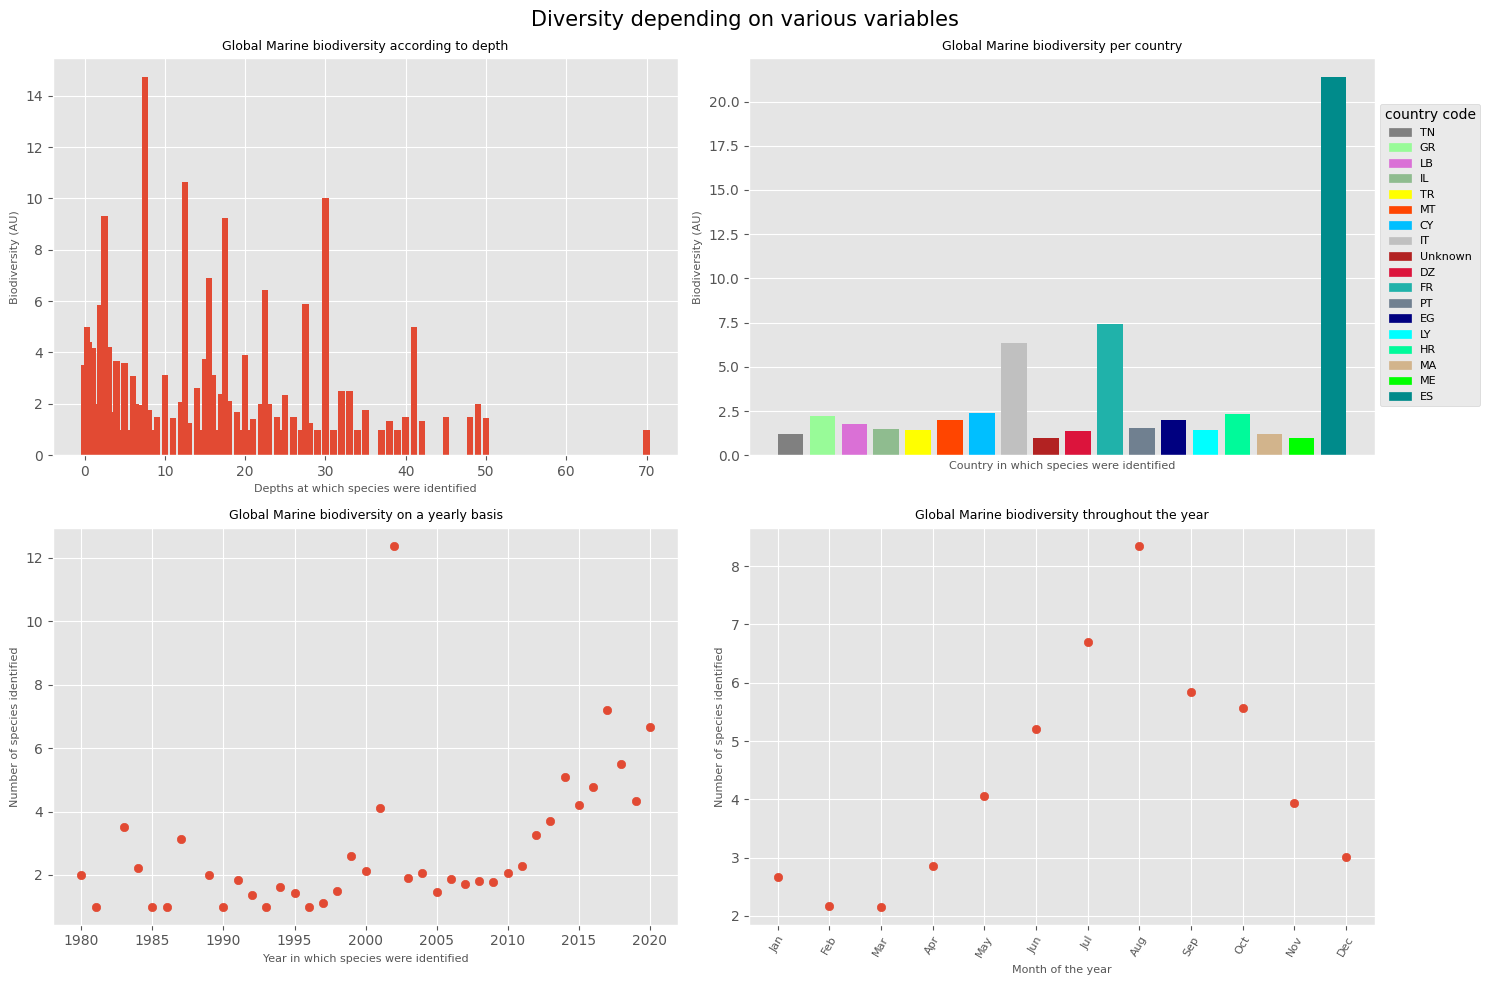

In [97]:
# Set the style to "ggplot"
plt.style.use("ggplot")

# Create subplots with 2 rows and 2 columns
plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Add a main title for the entire plot
plt.suptitle("Diversity depending on various variables", fontsize=15)

# Subplot 1: Biodiversity according to depth
plt.subplot(2, 2, 1)
plt.bar(depths, depth_biodiversity)
plt.xlabel("Depths at which species were identified", fontsize=8)
plt.ylabel("Biodiversity (AU)", fontsize=8)
plt.title("Global Marine biodiversity according to depth", fontsize=9)

# Subplot 2: Biodiversity according to country
plt.subplot(2, 2, 2)
plt.bar(countries, country_biodiversity, color=biodiversity_colors)
plt.xlabel("Country in which species were identified", fontsize=8)
plt.ylabel("Biodiversity (AU)", fontsize=8)
plt.title("Global Marine biodiversity per country", fontsize=9)

# Create color map with colors and country names for the legend
cmap = dict(zip(countries, biodiversity_colors))
# Create the rectangles for the legend
patches = [Patch(color=v, label=k) for k, v in cmap.items()]

# Add legend to subplot 2
plt.legend(handles=patches, ncol=1, title="country code", fontsize=8, bbox_to_anchor=(1, 0.9))
plt.xticks([])  # Hide x-axis ticks

# Subplot 3: Biodiversity according to year
plt.subplot(2, 2, 3)
plt.scatter(years, year_biodiversity)
plt.xlabel("Year in which species were identified", fontsize=8)
plt.ylabel("Number of species identified", fontsize=8)
plt.title("Global Marine biodiversity on a yearly basis", fontsize=9)

# Subplot 4: Biodiversity according to month
plt.subplot(2, 2, 4)
plt.scatter(months, month_biodiversity)
months2 = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=months2, rotation=60, fontsize=8)
plt.xlabel("Month of the year", fontsize=8)
plt.ylabel("Number of species identified", fontsize=8)
plt.title("Global Marine biodiversity throughout the year", fontsize=9)

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()

Conclusion: Majority of species have been identified in shallow waters however this is likelly to be due to sampling bias as these are more accesible areas. Highest biodiversity found in Spain. There is a peak in Biodiversity around 2000-2005. There is a clear peak of biodiversity around the August. This could potentially be biased if sampling does not take regularly throughout the year so this would have to be investigated further. 

Most and least common species in the database  overall

In [98]:
# Create a dataset of species count in the database
species_count = {}
species = []

# Collect all species from the 'species' column in the DataFrame
for key in newdf.species:
    species.append(key)

# Count the occurrences of each species and store in the species_count dictionary
for key in species:
    species_count[key] = species.count(key)

# Sort the species_count dictionary by count in ascending order
sorted_species = dict(sorted(species_count.items(), key=lambda item: item[1]))

# Create a new dictionary containing species with counts greater than 100
hundred_species = {}
for key in reversed(sorted_species):
    if sorted_species[key] > 100:
        hundred_species[key] = sorted_species[key]


# Create a dataset of genus count in the database
genus_count = {}
genus = []

# Collect all genus from the 'genus' column in the DataFrame
for key in newdf.genus:
    genus.append(key)

# Count the occurrences of each genus and store in the genus_count dictionary
for key in genus:
    genus_count[key] = genus.count(key)

# Sort the genus_count dictionary by count in ascending order
sorted_count = dict(sorted(genus_count.items(), key=lambda item: item[1]))

# Create a new dictionary containing genera with counts greater than 150
selected_genus = {}
for key in reversed(sorted_count):
    if sorted_count[key] > 150:
        selected_genus[key] = sorted_count[key]

Show this information on a graph 

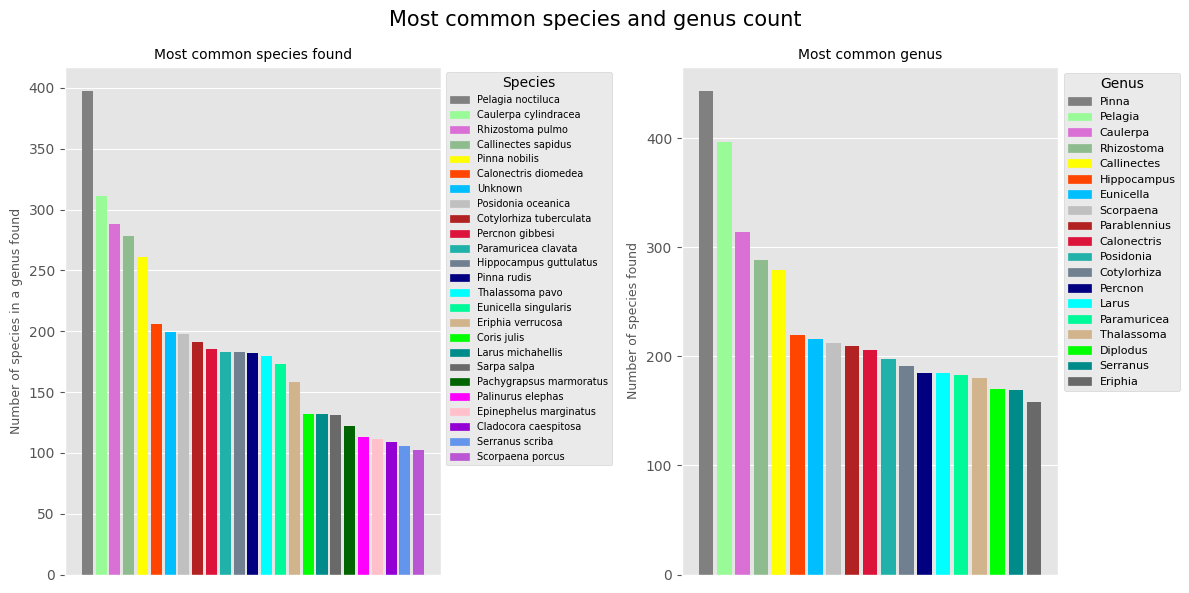

In [120]:
# Set the style to "ggplot"
plt.style.use("ggplot")

# Create a color map for genus and corresponding biodiversity colors
cmap2 = dict(zip(selected_genus, biodiversity_colors))

# Create rectangles for the legend using Patch objects
patches2 = [Patch(color=v, label=k) for k, v in cmap2.items()]

# Create a color map for species and corresponding biodiversity colors
cmap3 = dict(zip(hundred_species, biodiversity_colors))

# Create rectangles for the legend using Patch objects
patches3 = [Patch(color=v, label=k) for k, v in cmap3.items()]

# Create subplots with 1 row and 2 columns
plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for Most Common Species Found
plt.subplot(1, 2, 1)
plt.bar(range(len(hundred_species)), hundred_species.values(), color=biodiversity_colors)
plt.xticks([])
plt.ylabel("Number of species in a genus found", fontsize=9)
plt.legend(handles=patches3, ncol=1, title="Species", fontsize=7, bbox_to_anchor=(1, 1))
plt.title("Most common species found", fontsize=10)

# Plot for Most Common Genus
plt.subplot(1, 2, 2)
plt.bar(range(len(selected_genus)), selected_genus.values(), color=biodiversity_colors)
plt.xticks([])
plt.legend(handles=patches2, ncol=1, title="Genus", fontsize=8, bbox_to_anchor=(1, 1))
plt.ylabel("Number of species found", fontsize=9)
plt.title("Most common genus", fontsize=10)

# Add a main title for the entire plot
plt.suptitle("Most common species and genus count", fontsize=15)

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()

In [100]:
def get_list(name):
    """
    Get a list of species for a given genus from the DataFrame.

    Parameters:
    - name (str): The genus name to search for.

    Returns:
    list: A list of species belonging to the specified genus.
    """
    species_list = []
    # Iterate through the 'genus' column in the DataFrame
    for n in range(len(newdf.genus)):
        # Check if the genus name matches the specified name (case-insensitive)
        if newdf.genus[n].lower() == name.lower():
            # Append the corresponding species to the list
            species_list.append((newdf.species[n]))
    return species_list

def get_count(name):
    """
    Get the count of each species for a given genus from the DataFrame.

    Parameters:
    - name (str): The genus name to search for.

    Returns:
    dict: A dictionary containing the count of each species in the specified genus.
    """
    count = {}
    # Get the list of species for the specified genus
    species = get_list(name)
    # Create a set to get unique species
    species_set = set(species)
    # Count the occurrences of each species and store in the 'count' dictionary
    for key in species_set:
        count[key] = species.count(key)
    return count

# Print species count for specific genera
print(get_count("Pinna"))
print(get_count("Pelagia"))
print(get_count("Caulerpa"))
print(get_count("Rhizostoma"))
print(get_count("Callinectes"))


{'Pinna nobilis': 261, 'Pinna rudis': 182}
{'Pelagia noctiluca': 397}
{'Caulerpa cylindracea': 311, 'Caulerpa taxifolia': 3}
{'Rhizostoma pulmo': 288}
{'Callinectes exasperatus': 1, 'Callinectes sapidus': 278}


null hypotheisis: Biodiversity is randomly distributed among countries 

In [122]:
# Create a DataFrame named 'biodiversity_data' with columns 'countryCode' and 'biodiversity_index'

# Create a DataFrame
biodiversity_data = pd.DataFrame({'countryCode': countries, 'biodiversity_index': country_biodiversity})

# Filter data for Spain
spain_data = biodiversity_data[biodiversity_data['countryCode'] == 'ES']

# Create a contingency table
contingency_table = pd.crosstab(index=biodiversity_data['countryCode'], columns=biodiversity_data['biodiversity_index'])

# Perform Chi-Squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    print(f"Reject the null hypothesis. Biodiversity in Spain is significantly higher than expected by chance.")
else:
    print(f"Fail to reject the null hypothesis. Biodiversity in Spain is not significantly different than expected by chance.")

Fail to reject the null hypothesis. Biodiversity in Spain is not significantly different than expected by chance.


null hypotheisis: Pelagia noctiluca is not significantly more common than other species

In [126]:
# Create a DataFrame named 'species_number' with columns 'species' and 'count'

# Create a DataFrame
species_number = pd.DataFrame({'species': species_count.keys(), 'count': species_count.values()})

# Filter data for Pelagia noctiluca
Pelagia_noctiluca = species_number[species_number['species'] == 'Pelagia noctiluca']

# Create a contingency table
contingency_table = pd.crosstab(index=species_number['species'], columns=species_number['count'])

# Perform Chi-Squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    print(f"Reject the null hypothesis. Pelagia noctiluca is significantly more common than other species")
else:
    print(f"Fail to reject the null hypothesis. Pelagia noctiluca count is not significantly different than expected by chance.")

                       species  count
0                      Unknown    199
1      Hippocampus hippocampus     37
2          Callinectes sapidus    278
3             Rhizostoma pulmo    288
4       Hippocampus guttulatus    183
..                         ...    ...
452     Atelecyclus rotundatus      2
453     Knipowitschia panizzae      1
454              Gobius roulei      1
455  Pomatoschistus marmoratus      1
456         Podiceps cristatus      1

[457 rows x 2 columns]
Fail to reject the null hypothesis. Pelagia noctiluca count is not significantly different than expected by chance.


null hypotheisis: August does not show significantly increased Biodiversity.

In [129]:

# Create a DataFrame named 'monthly_biodiversity' with columns 'month' and 'biodiversity'

# Create a DataFrame
monthly_biodiversity = pd.DataFrame({'month': months, 'biodiversity': month_biodiversity})

# Filter data for Pelagia noctiluca
August = monthly_biodiversity[monthly_biodiversity['month'] == 8]

# Create a contingency table
contingency_table = pd.crosstab(index=monthly_biodiversity['month'], columns=monthly_biodiversity['biodiversity'])

# Perform Chi-Squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    print(f"Reject the null hypothesis. August shows significantly more biodiversity")
else:
    print(f"Fail to reject the null hypothesis. August biodiversity is not significantly different than expected by chance.")

Fail to reject the null hypothesis. August biodiversity is not significantly different than expected by chance.


Conclusions: The most common species spotted is Pelagia noctiluca and the most common genus in the database is Pinna. Pelagia noctiluca is a jellyfish commonly known as mauve stinger, they a predatory species which produces a strong toxin. They often wash up on beaches which explains their vast abundance in the database. Pinna is a genus of bivalve molluscs and the two species belonging to this genus in the database are Pinna rudis and Pinna nobilis. Pinna rudis, the rough pen shell or spiny fan-mussel,lives in small patches of sand in rocky bottoms and in rock crevices, at depths ranging from the surface to 60 m. Pinna nobilis, whose common name is the noble pen shell or fan mussel, is a large species of Mediterranean clam, a marine bivalve mollusc attaches itself to rocks using a strong byssus composed of many silk-like threads. Like all pen shells, it is relatively fragile to pollution and shell damage. This suggests a relatively polutant free enviroment cintributed to its large numbers. However no statistically significant data was colected. Perhaps a larger sample size would result in better outcomes. As my next steps I would try to colect more data from different sources for further analysis. 